# Capstone Project: Olympics Dataset - 120 years of data


## Description 
As a sport enthusiast who has been trained some different kinds of sport for my whole life, olympic is the biggest and the most important sport event on earth where all the top athletes from all over the world compete, where we can see the limits of human body and inspire stories.

The most important thing in professional sports is performance. This will likely have a correlation with physical indicators. In this project I will explore the correlation between basic metrics such as height, weight, age and athletes' performance (the medals they win). Along with that, I also want to learn more about special/unusual cases in the data sample.

This analysis may provide interesting insights for general sports fans or sports practitioners and trainers as they can maybe apply these to their training programs.

## 1. Get familiar with the dataset

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. 

### 1.1 Importing packages and data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [23]:
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

### 1.2 Metadata and statistical informations of the dataset

In [24]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [25]:
athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [26]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.00,261642.00,210945.00,208241.00,271116.00
mean,68248.95,25.56,175.34,70.70,1978.38
std,39022.29,6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,1896.00
25%,34643.00,21.00,168.00,60.00,1960.00
50%,68205.00,24.00,175.00,70.00,1988.00
75%,102097.25,28.00,183.00,79.00,2002.00
max,135571.00,97.00,226.00,214.00,2016.00


This dataset includes 2 csv files. The first file has 271116 rows and 15 columns. Each row corresponds to an athlete participating in an event. The columns are the following

- ID:      unigue number for each athlete
- Name:    athlete's name
- Sex:     male or female
- Age:     athlete's age
- Height:  in cm
- Weight:  in kg
- Team:    team's name 
- NOC:     national olympic committee (3 letter code)
- Games:   year and season
- Year    
- Season:  summer or winter
- City:    host city
- Sport   
- Event   
- Medal:   gold, silver, bronze or NA


In [27]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


There are some missing value in region

In [28]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [29]:
regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


- The second file has 230 rows and 3 columns. Each row has NOC code, the region or country that NOC represents and a note if that region has/had any another name. 
- While generally, each country or region has one NOC, there are a few exceptions due to historical, political, and territorial reasons. 
For example: After World War II, Germany was divided into East Germany (German Democratic Republic) and West Germany (Federal Republic of Germany). Each had its own NOC and competed separately in the Olympics until reunification in 1990.

## 2. Cleaning data 

### 2.1 Handling missing value

We can see there are missing value in Age, Height, Weight. In this project I may just drop the missing values if necesary. 

### 2.2 Remove duplicate

Show duplicated rows

In [30]:
region_dup = regions[regions.duplicated(keep=False)]

In [31]:
athlete_dup = athletes[athletes.duplicated(keep=False)]
athlete_dup

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1251,704,Dsir Antoine Acket,M,27.00,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
1252,704,Dsir Antoine Acket,M,27.00,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4281,2449,William Truman Aldrich,M,48.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4282,2449,William Truman Aldrich,M,48.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.00,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269998,135073,Doris Clare Zinkeisen (-Johnstone),F,49.00,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.00,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
270199,135173,Henri Achille Zo,M,58.00,NaN,NaN,France,FRA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


Remove duplicates

In [32]:
athletes = athletes.drop_duplicates()

Merge two tables

In [33]:
data = pd.merge(athletes, regions, on='NOC', how='left')

## 3. Initial exploration

### 3.1 The distribution of age of gold medalist

In [34]:
# medals = athletes[athletes.Medal.notnull()]
gold_medalists = data[data.Medal == 'Gold']
gold_medalists.describe()

,ID,Age,Height,Weight,Year
count,13369.00,13222.00,10539.00,10254.00,13369.00
mean,69365.37,25.90,177.90,74.18,1973.15
std,39029.35,5.89,11.05,15.21,34.17
min,4.00,13.00,136.00,28.00,1896.00
25%,36060.00,22.00,170.00,63.00,1952.00
50%,69093.00,25.00,178.00,73.00,1984.00
75%,103707.00,29.00,185.00,84.00,2002.00
max,135553.00,64.00,223.00,170.00,2016.00


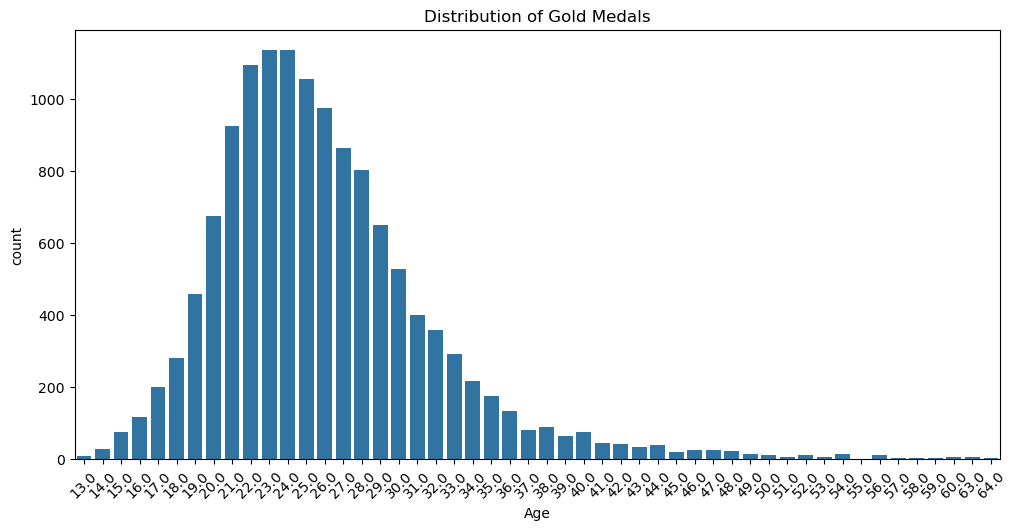

In [35]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
plt.tight_layout()
sns.countplot(data=gold_medalists,x='Age')
plt.title('Distribution of Gold Medals');

50% of athletes who won gold medals were between 22 and 29 years old

### 3.2 The distribute of sex

Text(0.5, 1.0, 'Distribution of Sex')

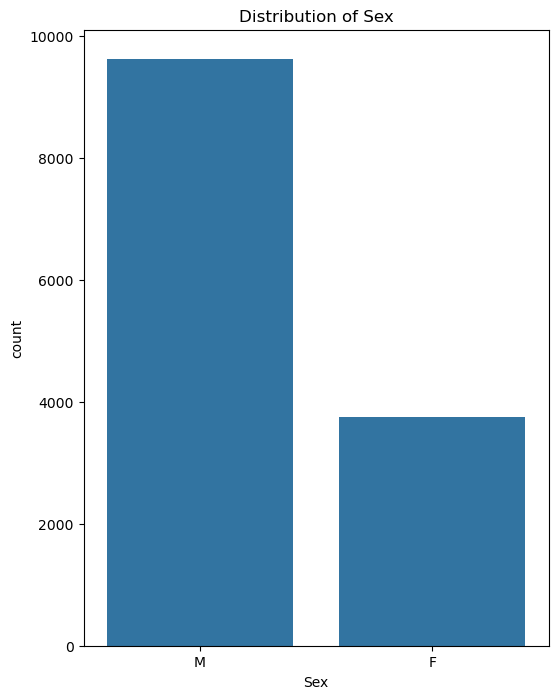

In [36]:
plt.figure(figsize=(6, 8))
plt.tight_layout()
sns.countplot(data=gold_medalists,x='Sex')
plt.title('Distribution of Sex')

### 3.3 Top 10 countries that won the most gold medals

In [37]:
medal_country = gold_medalists.region.value_counts().reset_index(name='Medal').head(10)
medal_country

,region,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,677
4,Italy,575
5,France,499
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


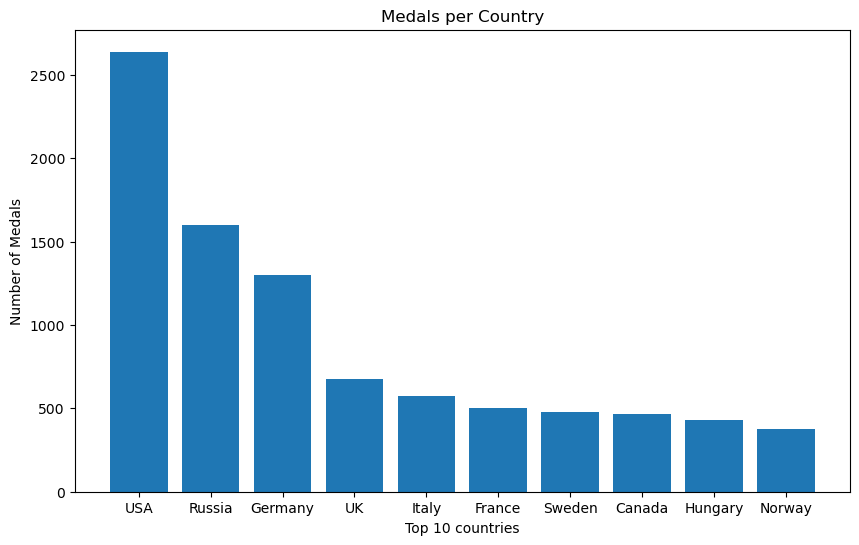

In [38]:
plt.figure(figsize=(10, 6))  
plt.bar(medal_country['region'], medal_country['Medal'])
plt.xlabel('Top 10 countries')
plt.ylabel('Number of Medals')
plt.title('Medals per Country')
#plt.grid(True)  # Optional: Add grid lines
plt.show()

It can be seen that there is a large gap between the top 3 and the remaining countries. 

### 3.4 Change in the number of sports

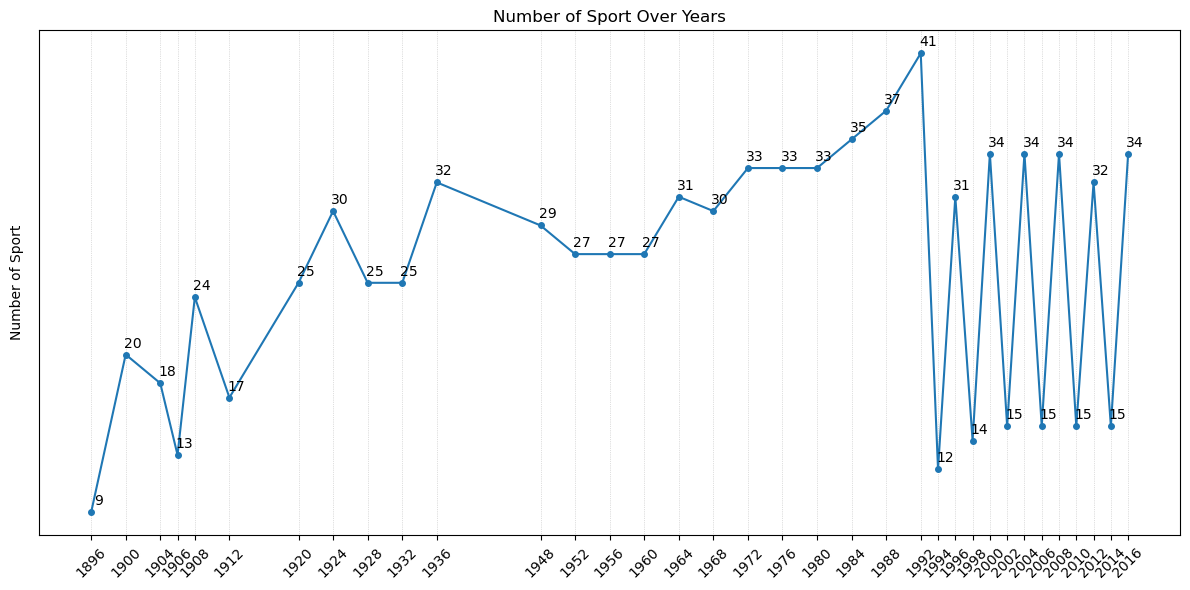

In [39]:
sport_count = data.loc[:,['Year','Sport']].drop_duplicates().groupby(['Year']).size().reset_index()
sport_count.columns = ['Year','Sport_Count'] # change name of columns
plt.figure(figsize=(12,6))
plt.plot(sport_count['Year'],sport_count['Sport_Count'],marker ='o',markersize=4,label='Number of sports')

for i in range(len(sport_count)):
    plt.annotate(
        str(sport_count['Sport_Count'].iloc[i]),
        (sport_count['Year'].iloc[i], sport_count['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  # Distance from the marker
        ha='center'  # Horizontal alignment
    )

# remove ticks and number on y-axis
plt.tick_params(axis='y', which='both', left=False, right=False)
plt.gca().axes.yaxis.set_ticklabels([])

plt.xticks(sport_count['Year'].unique(),rotation=45)
plt.grid(True, axis='x',linestyle='dotted',linewidth=0.5,color='gray',alpha=0.5)
plt.ylabel('Number of Sport')
plt.title('Number of Sport Over Years')
plt.tight_layout()
plt.show()

- The number of sports in the early Olympic Games from 1896 to 1952 changed frequently as the organizers experimented with different events and formats find the right mix for the Games. This period of trial and error reflects the organizers' efforts to refine and perfect the Olympics. 
- From 1952 to 1992, the number of sports increased steadily.
- After 1992, the winter and summer Olympics no longer took place in the same year but were held alternately. That's why we can see the up and down shape of the graph. The number of winter and summer sports are relative steady

### 3.5 Correlation between Height and Weight

In [40]:
height_weight = gold_medalists.loc[:,['Name','Sex','Height','Weight','Sport','region','Year','Season']].drop_duplicates().dropna()

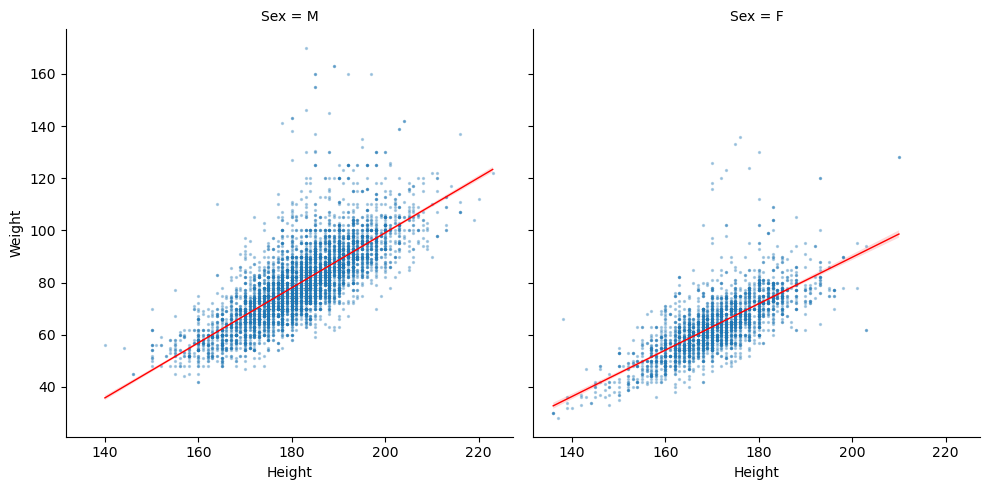

In [41]:
sns.lmplot(height_weight,x='Height',y='Weight',col='Sex',line_kws=dict(lw=1,color="r"),scatter_kws=dict(alpha=0.3, s=2));

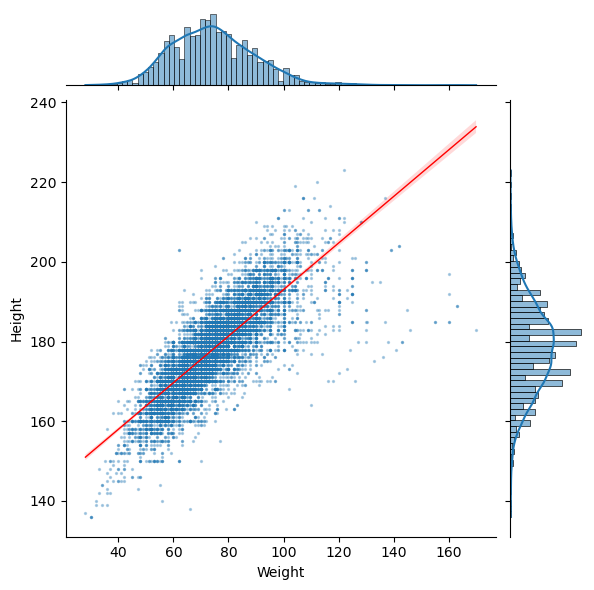

In [42]:
sns.jointplot(height_weight,x='Weight',y='Height',kind='reg',line_kws=dict(lw=1,color="r"),scatter_kws=dict(alpha=0.3, s=2))

In [43]:
from scipy import stats
stats.pearsonr(height_weight['Height'],height_weight['Weight'])[0]

0.8043049294644917

It shows linear correlation between height and weight. Lets explore some exceptions

In [44]:
gold_medalists[(gold_medalists['Height'] >= 200) & (gold_medalists['Weight'] <=65)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
57115,29426,Anne Theresa Donovan,F,22.00,203.00,62.00,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Gold,USA,NaN
57116,29426,Anne Theresa Donovan,F,26.00,203.00,62.00,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Gold,USA,NaN


In [45]:
gold_medalists[(gold_medalists['Weight'] >= 160)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4401,2511,Vasily Ivanovich Alekseyev,M,30.00,185.00,160.00,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
4402,2511,Vasily Ivanovich Alekseyev,M,34.00,185.00,160.00,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
38987,20144,Andrey Ivanovich Chemerkin,M,24.00,183.00,170.00,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
207523,104740,Behdad Salimi Kordasiabi,M,22.00,192.00,160.00,Iran,IRI,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Iran,NaN
234282,118074,Lasha Talakhadze,M,22.00,197.00,160.00,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Georgia,NaN
267280,134407,Leonid Ivanovych Zhabotynskiy,M,26.00,189.00,163.00,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
267281,134407,Leonid Ivanovych Zhabotynskiy,M,30.00,189.00,163.00,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


## 4. Deeper analysis

### 4.1 Age exceptions

In [46]:
import numpy as np
ages = gold_medalists['Age'].dropna()
np.percentile(ages,1)

16.0

1% of gold medalist are or younger than 16 years old. Let's see who they are and what sports they play

In [47]:

young_medalist = gold_medalists[gold_medalists.Age <= 16].groupby('Sport').size()
young_medalist

Sport
Athletics                      3
Bobsleigh                      1
Boxing                         1
Croquet                        2
Diving                        12
Fencing                        1
Figure Skating                 7
Football                       1
Gymnastics                    56
Judo                           1
Rhythmic Gymnastics            7
Rowing                        14
Sailing                        2
Shooting                       1
Short Track Speed Skating      3
Ski Jumping                    2
Speed Skating                  1
Swimming                     109
Tennis                         1
dtype: int64

So most of them won medal in Swimming, Gymnastics, Diving, and Rowing

In [48]:
np.percentile(ages,99)

47.0

1% of gold medalist are older than 47 years old

In [49]:
old_medalist = gold_medalists[gold_medalists.Age > 47].groupby('Sport').size()
old_medalist

Sport
Alpinism             4
Archery             12
Art Competitions    11
Bobsleigh            1
Croquet              1
Curling              3
Equestrianism       28
Fencing              3
Polo                 1
Roque                1
Sailing             25
Shooting            23
dtype: int64

Most of them won gold medals in Shooting, Sailing, Equestrianism, Archery and Art Competitions 

Let's see what sports the youngest and oldest athletes in Olympic history competed in

In [50]:
min_age = data['Age'].min()
youngest = data[data.Age == min_age]
youngest

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
142104,71691,Dimitrios Loundras,M,10.00,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN


In [51]:
max_age = data['Age'].max()
oldest = data[data.Age == max_age]
oldest

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
255752,128719,John Quincy Adams Ward,M,97.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


### 4.2 Summer and winter sports

In [52]:
sport_number_season = data.loc[:,['Year','Season','Sport']].drop_duplicates().groupby(['Year','Season']).size().reset_index()
sport_number_season.columns = ['Year', 'Season', 'Sport_Count'] # change name of columns
sport_count_winter = sport_number_season[sport_number_season['Season'] == 'Winter']
sport_count_summer = sport_number_season[sport_number_season['Season'] == 'Summer']
# can also use sql queries extract the data
# from pandasql import sqldf
# pysqldf = lambda q: sqldf(q, globals())
# summer_sport_number = sqldf("select Year, count(distinct Sport) as Sport_number from athletes where Season = 'Summer' group by Year")
# winter_sport_number = sqldf("select Year, count(distinct Sport) as Sport_number from athletes where Season = 'Winter' group by Year")

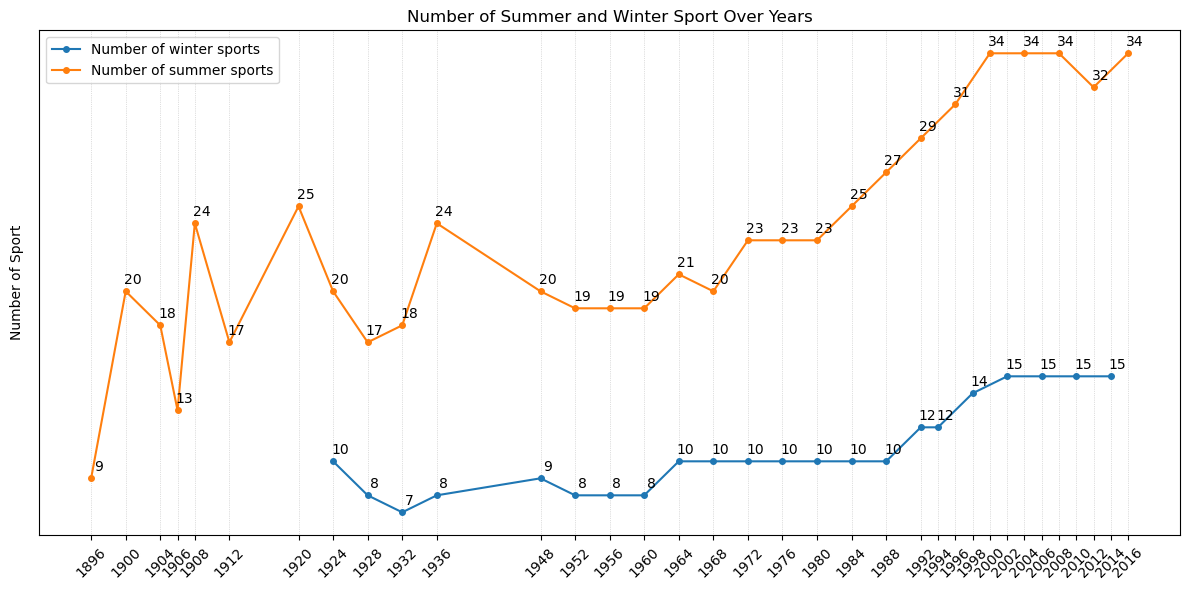

In [53]:
plt.figure(figsize=(12,6))
plt.plot(sport_count_winter['Year'],sport_count_winter['Sport_Count'],marker ='o', markersize=4,label='Number of winter sports')
plt.plot(sport_count_summer ['Year'],sport_count_summer ['Sport_Count'],marker ='o', markersize=4,label='Number of summer sports')

for i in range(len(sport_count_winter)):
    plt.annotate(
        str(sport_count_winter['Sport_Count'].iloc[i]),
        (sport_count_winter['Year'].iloc[i], sport_count_winter['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  # Distance from the marker
        ha='center'  # Horizontal alignment
    )

for i in range(len(sport_count_summer)):
    plt.annotate(
        str(sport_count_summer['Sport_Count'].iloc[i]),
        (sport_count_summer['Year'].iloc[i], sport_count_summer['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  # Distance from the marker
        ha='center'  # Horizontal alignment
    )

# remove ticks and number on y-axis
plt.tick_params(axis='y', which='both', left=False, right=False)
plt.gca().axes.yaxis.set_ticklabels([])

plt.xticks(sport_number_season['Year'].unique(),rotation=45)
plt.grid(True, which='both', axis='x', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.ylabel('Number of Sport')
plt.legend()
plt.title('Number of Summer and Winter Sport Over Years')
plt.tight_layout()
plt.show()

In [54]:
summer_sport_over_year = data[data['Season'] == 'Summer'].loc[:, ['Year', 'Sport']].drop_duplicates().sort_values(by='Year')
# SQL
# summer_sport_over_year = pysqldf("select distinct Year, Sport from athletes where Season = 'Summer' order by Year")

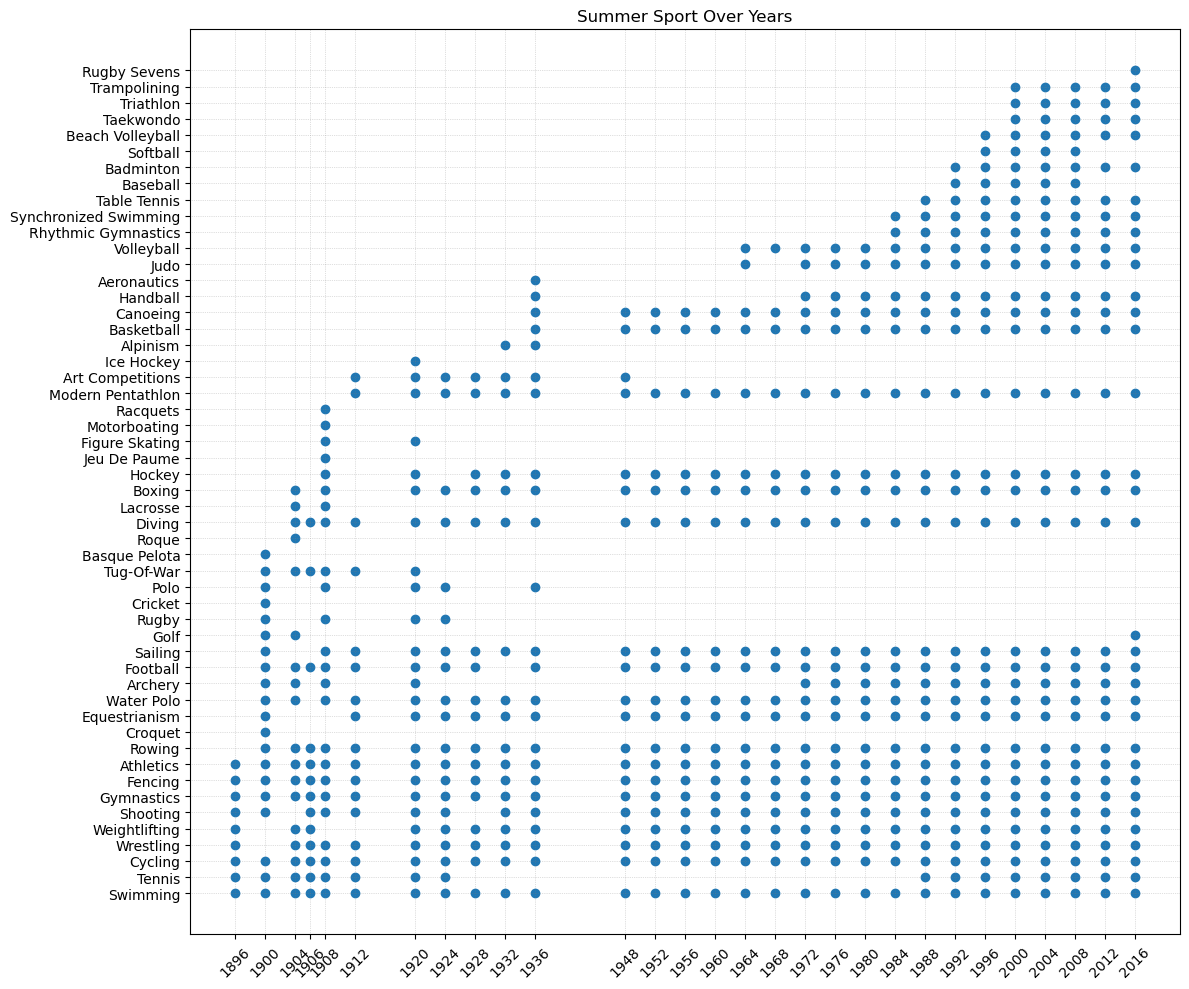

In [55]:
plt.figure(figsize=(12, 10))
plt.scatter(summer_sport_over_year['Year'], summer_sport_over_year['Sport'])
plt.xticks(summer_sport_over_year['Year'].unique(),rotation=45)
plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.title('Summer Sport Over Years')
plt.tight_layout()
plt.show()

- We can see that sports are added to the Olympics over time. Wrestling, weightlifting, fencing, cycling, shooting, gymnastics, swimming, athletics, tennis are the oldest sports and still present in Summer Olympic till this day. 
- The 1916 Summer Olympic was canceled because of ww1. The 1940, 1944 Summer and Winter Olympics were canceled because of ww2
- The 1906 Intercalated Games, also known as the Interim Olympics, were intended to occur every four years between the regular Olympic Games. The idea was to have these games alternate with the main Olympics to maintain public interest and give athletes more frequent opportunities to compete. However, the concept of the Intercalated Games was abandoned after 1906 due to logistical and financial challenges.
- Tennis was the oldest sport in Olympic game but somehow was absent from 1928 to 1984. I did some research and found out the reason of this absence. The reason is conflict over amateurism between IOC and International Lawn Tennis Federatioin (ILTF). The ILTF's definition of an amateur was very strict. Players could not receive any financial compensation, prize money, or material benefits for their participation in tennis. True amateurs were always welcome to compete in the Olympics. However, the best tennis players often turned professional due to the financial opportunities, making the competition less representative of the top talent. The ILTF’s rigid stance on amateurism meant that many top players were excluded from the Olympics, leading to tennis being dropped from the Olympic program after 1924. The IOC’s willingness to adapt its amateurism rules eventually facilitated the return of tennis to the Olympics, aligning with the professional nature of modern sports.
- I always though that Olympic athletes are indeed among the top and most professional in their respective sports. However, this hasn't always been the case. The Olympic Games were initially designed for amateur athletes, reflecting the Victorian ideals of sport as a noble and honorable pursuit free from the influence of money. Over time, however, the strict enforcement of amateurism became impractical due to the financial realities of training and competition at an elite level. The IOC gradually relaxed its rules to accommodate professional athletes, leading to the modern Olympics where the best athletes, regardless of their amateur or professional status, compete for glory on the world stage.

In [56]:
winter_sport_over_year = data[data['Season'] == 'Winter'].loc[:,['Year','Sport']].drop_duplicates().sort_values(by='Year')
# SQL
# winter_sport_over_year = pysqldf("select distinct Year, Sport from athletes where Season = 'Winter' order by Year")

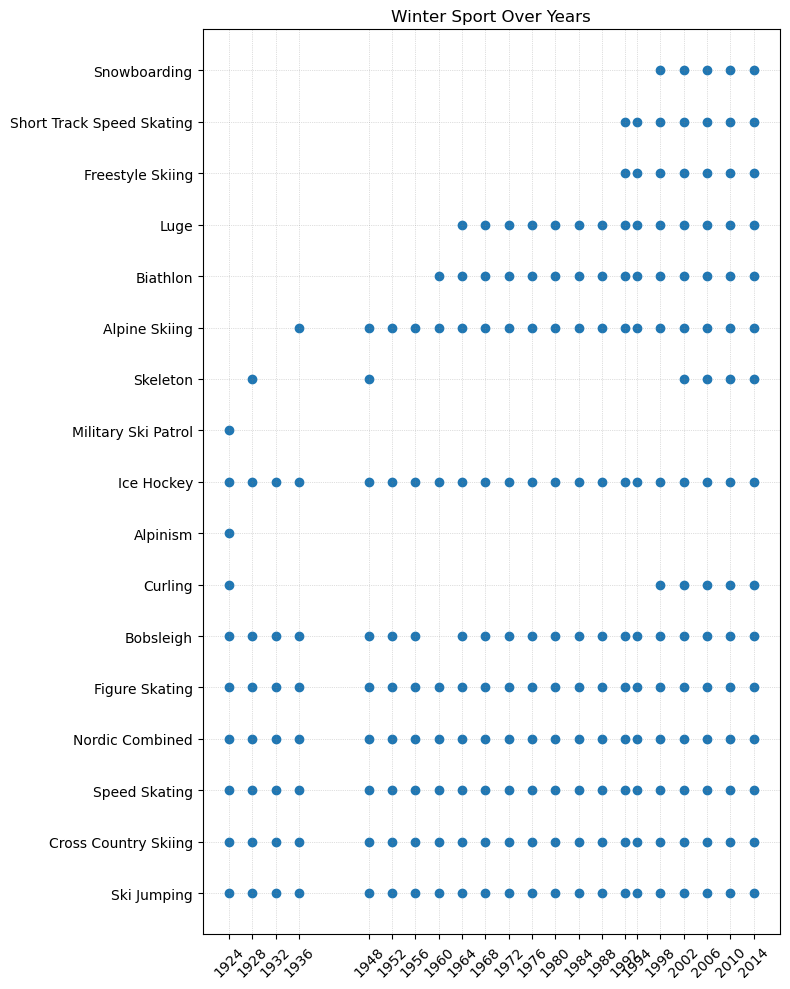

In [57]:
plt.figure(figsize=(8, 10))
plt.scatter(winter_sport_over_year['Year'], winter_sport_over_year['Sport'])
plt.xticks(winter_sport_over_year['Year'].unique(),rotation=45)
plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.title('Winter Sport Over Years')
plt.tight_layout()
plt.show()

- The history of modern Winter Olympic began in 1924. There are less sports than in Summer Olympic and the list of sports is also not so varying. 
- The 1940, 1944 Summer and Winter Olympics were canceled because of ww2.
- The 1994 Winter Olympics was the first time Summer and Winter Olympic weren't organised in the same year. The decision were made to separate Summer and Winter Olympic, give each event its own spotlight ans to ease the organisational burden. The 1994 Winter Olympics marked the beginning of this new cycle.

### 4.3 Male and Female Sports

In [58]:
sport_count_sex = data.loc[:,['Year','Sex','Sport']].drop_duplicates().groupby(['Sex','Year']).size().reset_index() 
sport_count_sex.columns = ['Sex','Year','Sport_Count']
sport_count_male = sport_count_sex[sport_count_sex['Sex'] == 'M']
sport_count_female = sport_count_sex[sport_count_sex['Sex'] == 'F']

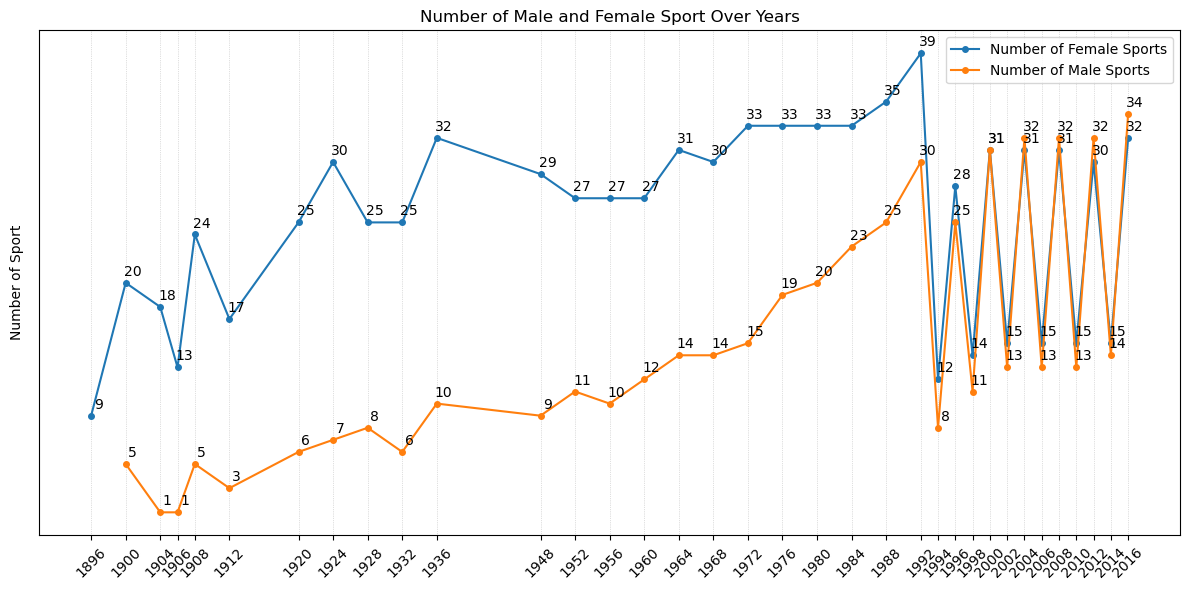

In [59]:
plt.figure(figsize=(12,6))
plt.plot(sport_count_male['Year'],sport_count_male['Sport_Count'],marker='o',markersize=4,label='Number of Female Sports')
plt.plot(sport_count_female['Year'],sport_count_female['Sport_Count'],marker='o',markersize=4,label='Number of Male Sports')

for i in range(len(sport_count_male)):
    plt.annotate(
        str(sport_count_male['Sport_Count'].iloc[i]),
        (sport_count_male['Year'].iloc[i], sport_count_male['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  # Distance from the marker
        ha='center'  # Horizontal alignment
    )

for i in range(len(sport_count_female)):
    plt.annotate(
        str(sport_count_female['Sport_Count'].iloc[i]),
        (sport_count_female['Year'].iloc[i], sport_count_female['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  # Distance from the marker
        ha='center'  # Horizontal alignment
    )

# remove ticks and number on y-axis
plt.tick_params(axis='y', which='both', left=False, right=False)
plt.gca().axes.yaxis.set_ticklabels([])
plt.xticks(sport_count_sex['Year'].unique(),rotation=45)
plt.grid(True, which='both', axis='x', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.ylabel('Number of Sport')
plt.legend()
plt.title('Number of Male and Female Sport Over Years')
plt.tight_layout()
plt.show()


- It can be seen that this chart has a pattern corresponding to the chart of changes in the number of sports over the years in section 3.4.
- At the beginning, there was a big different between the number of sports for woman and man but, after 1994 Winter Olympic Games, there has been almost no different between them.
- In the graph there was just 1 sport for woman in 1904 and 1906, I checked it to be sure that the data is correct. And it is. The only one sport for woman in 1904 is archery and in 1906 is tennis.  

### 4.4 Development in sports of countries

I chose the 1994 winter Olympics as the starting point for analysis because that was the year that marked the alternating winter and summer Olympic calendar and since then the number of sports has not changed significantly. This shows that the organization of the Olympics has been relatively complete

In [60]:
gold_count_countries = (gold_medalists[gold_medalists.Year > 1992]
                        .loc[:,['region','Year']].groupby(['region','Year']).size().reset_index(name='Medal')
                        .sort_values(by=['Year','Medal'],ascending=[True,False])
                        .groupby(['Year']).head(5)
                        )
                        

countries = gold_count_countries['region'].unique()
years = gold_count_countries['Year'].unique()

/var/folders/p6/w13x_cwn5dg7617yq76q38kh0000gn/T/ipykernel_47475/1525787867.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(countries))


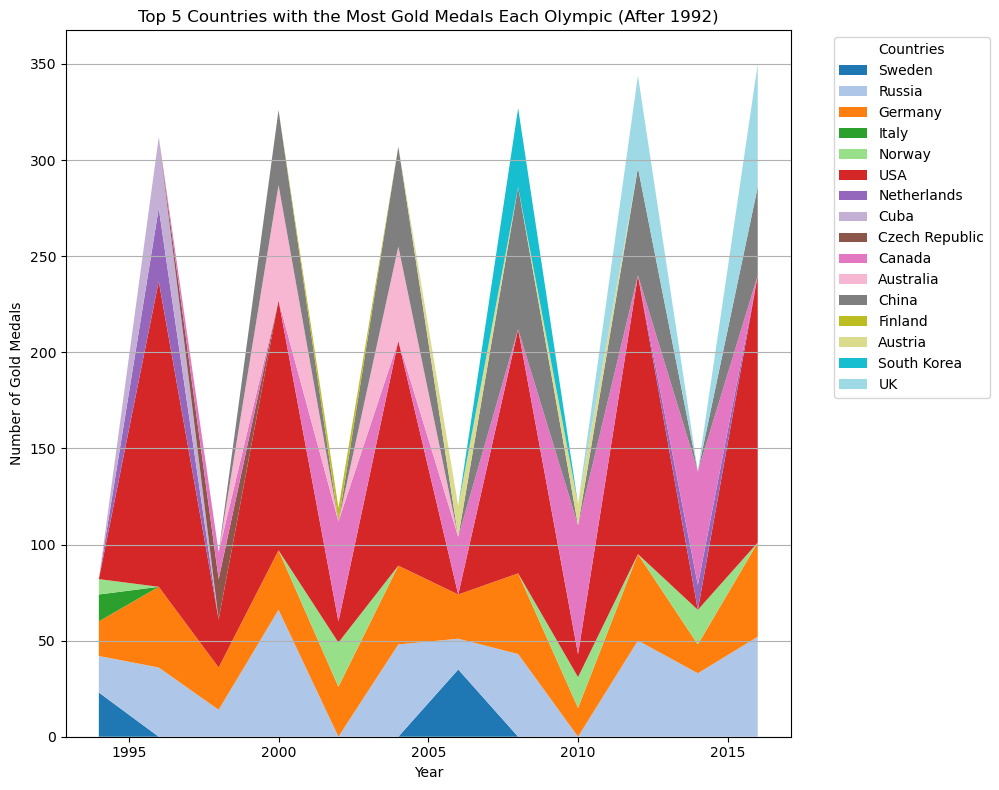

In [61]:
import matplotlib.cm as cm

# Initialize data structure for stackplot
stack_data = np.zeros((len(countries), len(years)))

# Fill the data structure
for i, country in enumerate(countries):
    country_data = gold_count_countries[gold_count_countries['region'] == country]
    # Align country_data with the years
    country_data = country_data.set_index('Year').reindex(years, fill_value=0).reset_index()
    stack_data[i, :] = country_data['Medal'].values

fig, ax = plt.subplots(figsize=(12, 8))

# Define a colormap
colors = cm.get_cmap('tab20', len(countries))

# Plot the stacked area plot
ax.stackplot(years, stack_data, labels=countries, colors=[colors(i) for i in range(len(countries))])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Gold Medals')
ax.set_title('Top 5 Countries with the Most Gold Medals Each Olympic (After 1992)')
ax.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, axis='y')


plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

- USA, Russia, Germany still dominates both winter and summer olympics. 
- Norway and Canada are especially strong at the Winter Olympics. 
- Since 2000, China has continuously ranked in the top at the Summer Olympics, showing that the country has focused on investing in sports and that they also have great potential.

### 4.5 The dominant country in each sport

In [62]:
top_countries = (gold_medalists.loc[:,['region','Sport']].groupby(['region','Sport']).size().reset_index(name='Medal')
                 .sort_values(['Sport', 'Medal'], ascending=[True, False])
                 .groupby('Sport').first().reset_index()
                 .sort_values('region',ascending=False)
                 )

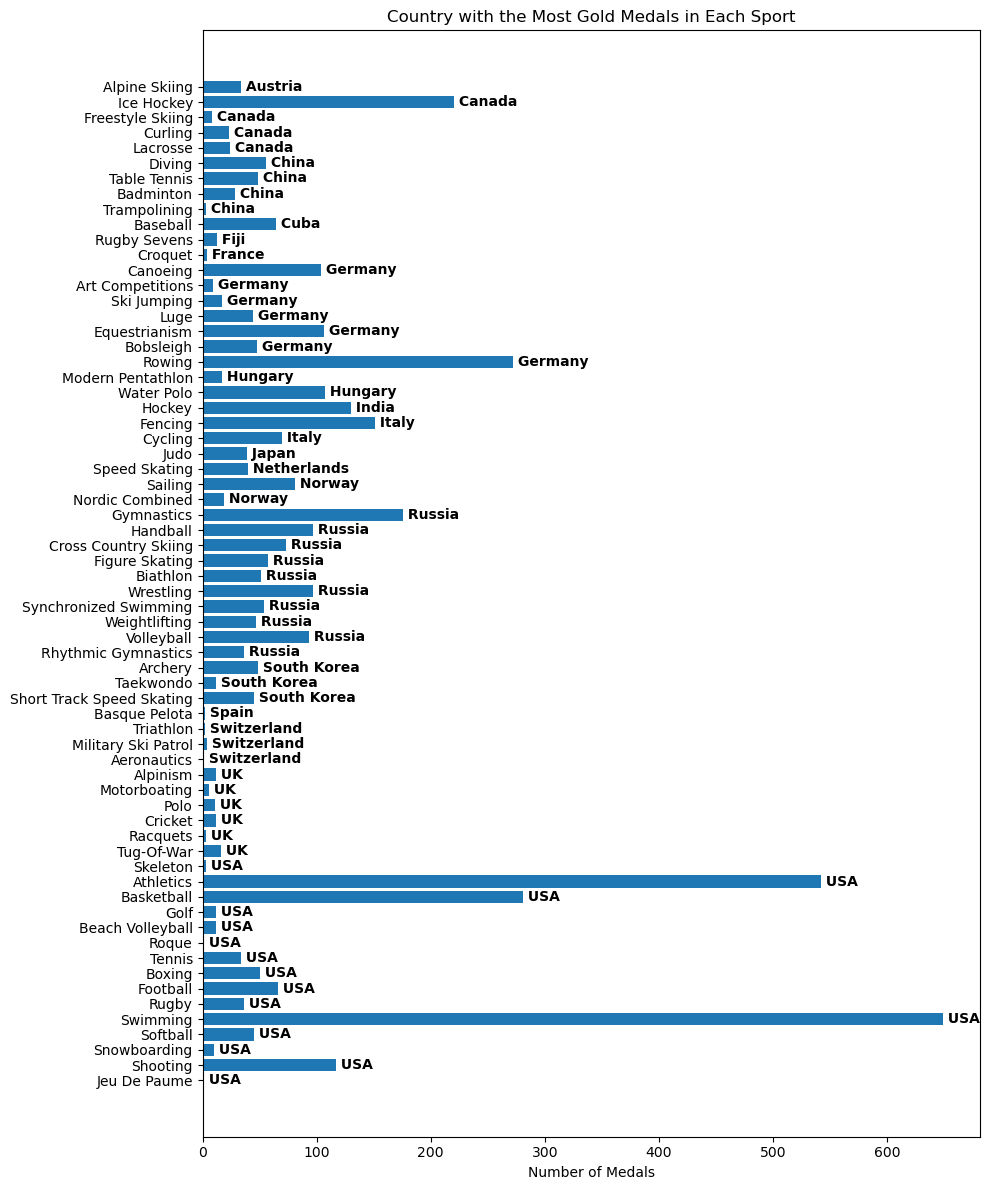

In [63]:
plt.figure(figsize=(10, 12))
plt.barh(top_countries['Sport'], top_countries['Medal'])

# Annotate with country names
for index, value in enumerate(top_countries['Medal']):
    plt.text(value, index, f' {top_countries["region"].iloc[index]}', va='center', ha='left', fontweight='bold')

plt.xlabel('Number of Medals')
plt.title('Country with the Most Gold Medals in Each Sport')
plt.tight_layout()
plt.show()

### 4.6 Weightlifting, Gymnastic and Boxing

I like Weightlifting, Gymnastic and Boxing so let focus on them

In [64]:
top_countries_over_years = (gold_medalists.loc[:,['Year','region','Sport']].groupby(['Year','region','Sport']).size().reset_index(name='Medal')
                 .sort_values(['Year','Sport', 'Medal'], ascending=[True,True, False])
                 .groupby(['Year','Sport']).first().reset_index()
)

wl_gym_box = (top_countries_over_years[(top_countries_over_years.Sport == 'Weightlifting')
                                       | (top_countries_over_years.Sport == 'Gymnastics')
                                       | (top_countries_over_years.Sport == 'Boxing')]
              )


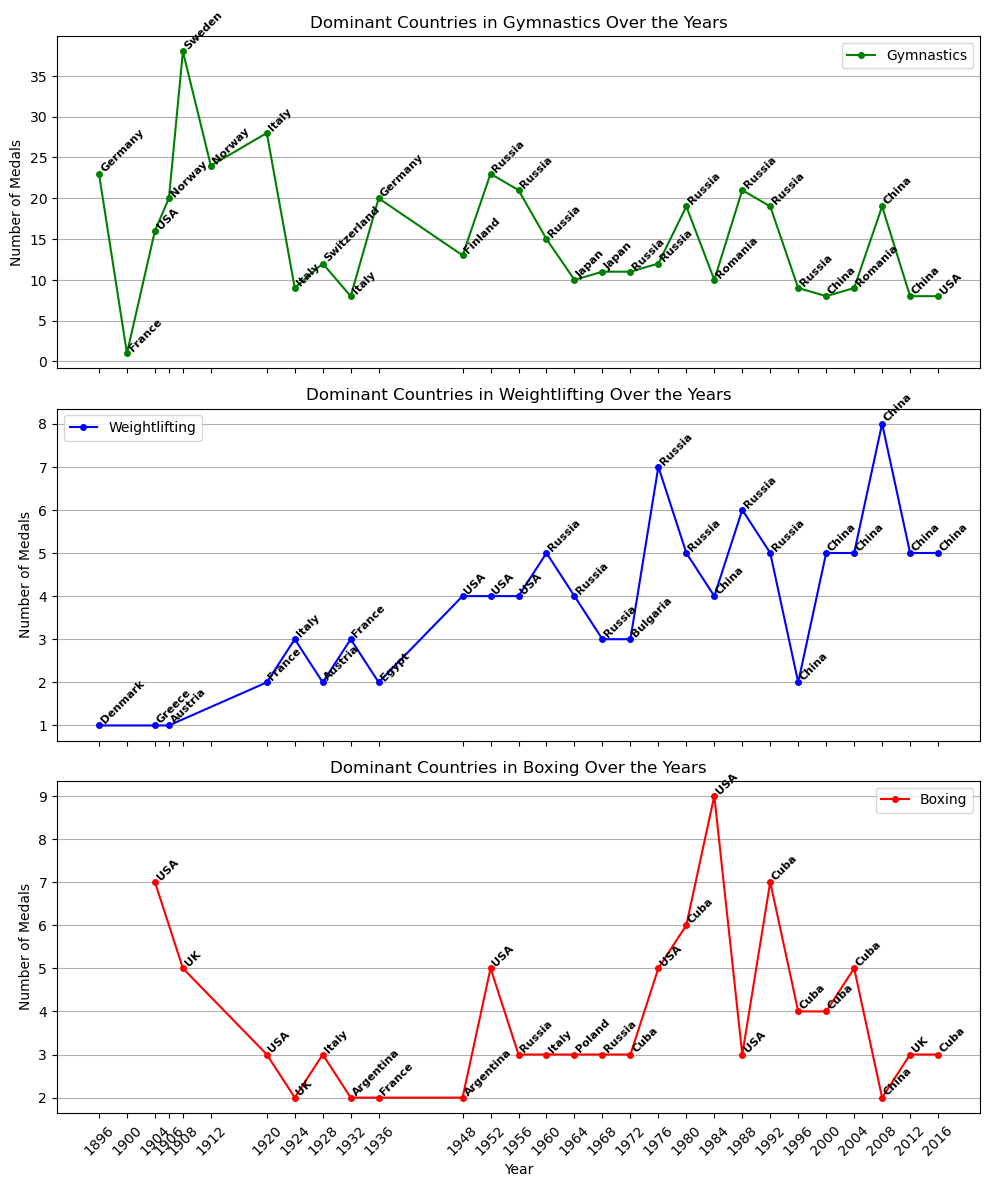

In [65]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Define colors for each sport
colors = {'Weightlifting': 'blue', 'Gymnastics': 'green', 'Boxing': 'red'}

# Plot each sport in a separate subplot
for ax, sport in zip(axes, wl_gym_box['Sport'].unique()):
    sport_data = wl_gym_box[wl_gym_box['Sport'] == sport]
    ax.plot(sport_data['Year'], sport_data['Medal'], marker='o',markersize=4, color=colors[sport], label=sport)

    # Annotate the plot with country names
    for i in range(len(sport_data)):
        ax.text(sport_data.iloc[i]['Year'], sport_data.iloc[i]['Medal'], sport_data.iloc[i]['region'], 
                fontsize=8, verticalalignment='bottom',rotation= 45,fontweight='bold')

    ax.set_ylabel('Number of Medals')
    ax.set_title(f'Dominant Countries in {sport} Over the Years')
    ax.legend()
    ax.grid(True, axis='y')

# Set common x-label
plt.xlabel('Year')
plt.xticks(wl_gym_box['Year'].unique(), rotation=45)
plt.tight_layout()

# Show plot
plt.show()

- As we can see in section 4.5, Russia had the most gold medals in Gymnastics and Weightlifting. But China has developed strongly in these two sports and has continuously become the country with the most gold medals in these 2 sports in recent years.
- Similarly, it can be seen that Cuba has risen strongly and replaced America in boxing

In [66]:
top_after = (gold_medalists[gold_medalists.Year > 1992].loc[:,['region','Sport']].groupby(['region','Sport']).size().reset_index(name='Medal')
                 .sort_values(['Sport', 'Medal'], ascending=[True, False])
                 .groupby('Sport').first().reset_index()
                 .sort_values('region',ascending=False)
                 )
top_3_after = top_after[(top_after.Sport == 'Weightlifting')
                                       | (top_after.Sport == 'Gymnastics')
                                       | (top_after.Sport == 'Boxing')]

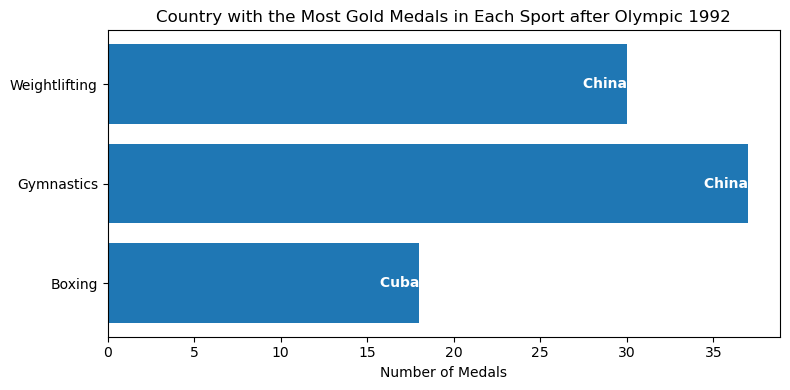

In [67]:
plt.figure(figsize=(8, 4))
plt.barh(top_3_after['Sport'], top_3_after['Medal'])

# Annotate with country names
for index, value in enumerate(top_3_after['Medal']):
    plt.text(value, index, f' {top_3_after["region"].iloc[index]}', va='center', ha='right', fontweight='bold',color='white')

plt.xlabel('Number of Medals')
plt.title('Country with the Most Gold Medals in Each Sport after Olympic 1992')
plt.tight_layout()
plt.show()

### 4.7 Physical metrics

#### 4.7.1 Average Height and Weight over Years

I will use point plot to visualize the trends of the mean and with error bar to show standard deviation

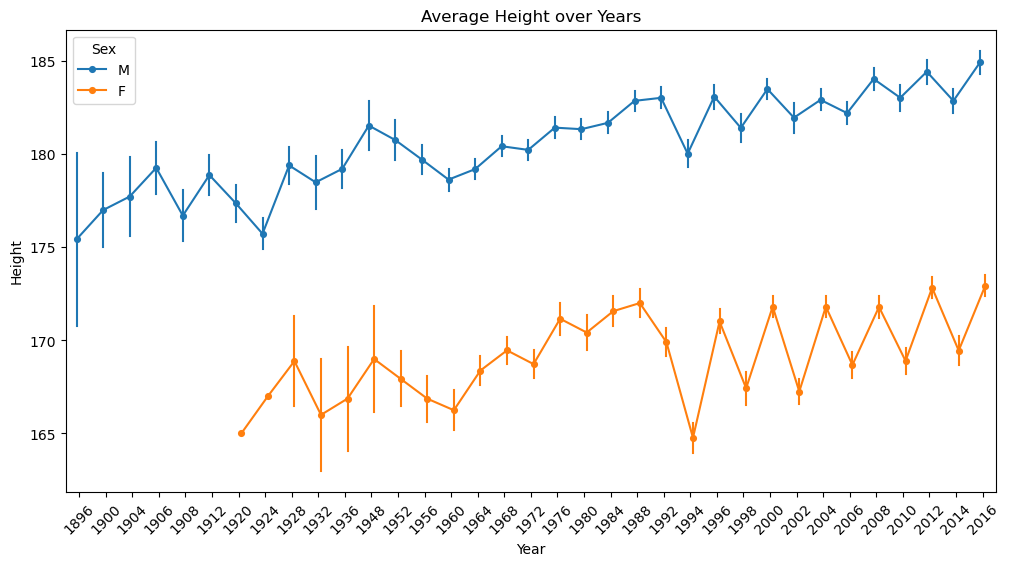

In [68]:
plt.figure(figsize=(12,6))
sns.pointplot(height_weight,x='Year',y='Height',hue='Sex',dodge=0.2,markersize=4,linewidth=1.5,errorbar='se').set_title('Average Height over Years')    
plt.xticks(rotation=45)
plt.show()

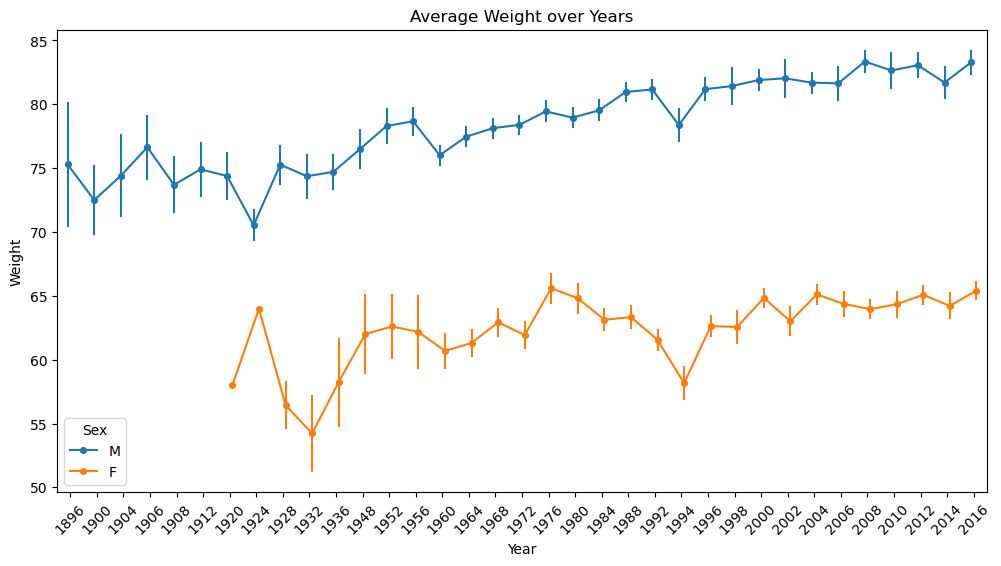

In [69]:
plt.figure(figsize=(12,6))
sns.pointplot(height_weight,x='Year',y='Weight',hue='Sex',dodge=0.2,markersize=4,linewidth=1.5,errorbar='se').set_title('Average Weight over Years')
plt.xticks(rotation=45)
plt.show()

- We can see the up and down shape of the graph after 1992. Because the olympics are held alternately and the winter olympics do not have sports where athletes usually have a great advantage when they are taller, such as swimming, volleyball, basketball, etc. At the same time, there are no weight-class sports such as weightlifting, boxing, judo, wrestling... so the average height and weight of athletes at the summer Olympics will tend to be higher than in the winter olympics. 
- The average height and weight slightly increase over years

- It seems like we don't have much informations about female athletes's weight and height of 1920 and 1924 Olympic. Check it and we see a lot of NA

In [70]:
gold_medalists[(gold_medalists.Year == 1920) & (gold_medalists.Sex == 'F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
23181,12248,Ethelda Marguerite Bleibtrey (-Schlatke),F,18.00,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 100 metres Freestyle,Gold,USA,NaN
23182,12248,Ethelda Marguerite Bleibtrey (-Schlatke),F,18.00,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 300 metres Freestyle,Gold,USA,NaN
23183,12248,Ethelda Marguerite Bleibtrey (-Schlatke),F,18.00,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
42314,21927,Anna Stefanie Nanny Fryland Clausen (-Fryland),F,20.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,Gold,Denmark,NaN
85541,43622,Irene May Guest (-Loog),F,19.00,157.00,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
104973,53409,Ludovika Antje Margareta Jakobsson-Eilers,F,35.00,165.00,58.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,Gold,Finland,NaN
110565,56258,Magda Maria Henrietta Julin (Mauroy-),F,25.00,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Figure Skating,Figure Skating Women's Singles,Gold,Sweden,NaN
135884,68705,Suzanne Rachel Flore Lenglen,F,20.00,NaN,NaN,France,FRA,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Women's Singles,Gold,France,NaN
135885,68705,Suzanne Rachel Flore Lenglen,F,20.00,NaN,NaN,France-3,FRA,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Mixed Doubles,Gold,France,NaN
153824,77653,"Kathleen ""Kitty"" McKane (-Godfree)",F,23.00,NaN,NaN,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Women's Doubles,Gold,UK,NaN


In [71]:
gold_medalists[(gold_medalists.Year == 1924) & (gold_medalists.Sex == 'F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
16182,8720,Sybil Lorina Bauer,F,20.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 100 metres Backstroke,Gold,USA,NaN
17184,9225,"Elizabeth Anna ""Betty"" Becker-Pinkston (-Campb...",F,21.00,155.00,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Diving,Diving Women's Springboard,Gold,USA,NaN
57074,29401,"Euphrasia Louise ""Fraze"" Donnelly (-Bungard, -...",F,18.00,163.00,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
60964,31394,"Gertrude Caroline ""Trudy"" Ederle",F,18.00,167.00,64.00,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
63358,32641,Helene Engelmann (-Jaroschka),F,25.00,NaN,NaN,Austria,AUT,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Mixed Pairs,Gold,Austria,NaN
129881,65742,Ethel Minnie Lackie (-Watkins),F,17.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 100 metres Freestyle,Gold,USA,NaN
129882,65742,Ethel Minnie Lackie (-Watkins),F,17.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
163145,82356,Lucy Morton (-Heaton),F,26.00,NaN,NaN,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 200 metres Breaststroke,Gold,UK,NaN
171973,86922,"Martha (Mrta) Maria Norelius (-McAllister, -Wr...",F,15.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 400 metres Freestyle,Gold,USA,NaN
177553,89754,Ellen Ottilia Osiier (Thomsen-),F,33.00,168.00,NaN,Denmark,DEN,1924 Summer,1924,Summer,Paris,Fencing,"Fencing Women's Foil, Individual",Gold,Denmark,NaN


In [72]:
height_weight_summer = height_weight[height_weight.Season == 'Summer']

In [73]:
height_weight_winter = height_weight[height_weight.Season == 'Winter']

#### 4.7.2 BMI

In [74]:
bmi = height_weight['BMI'] = height_weight['Weight'] / ((height_weight['Height']/100)**2)
bmi_summer = height_weight[height_weight.Season == 'Summer']
bmi_winter = height_weight[height_weight.Season == 'Winter']


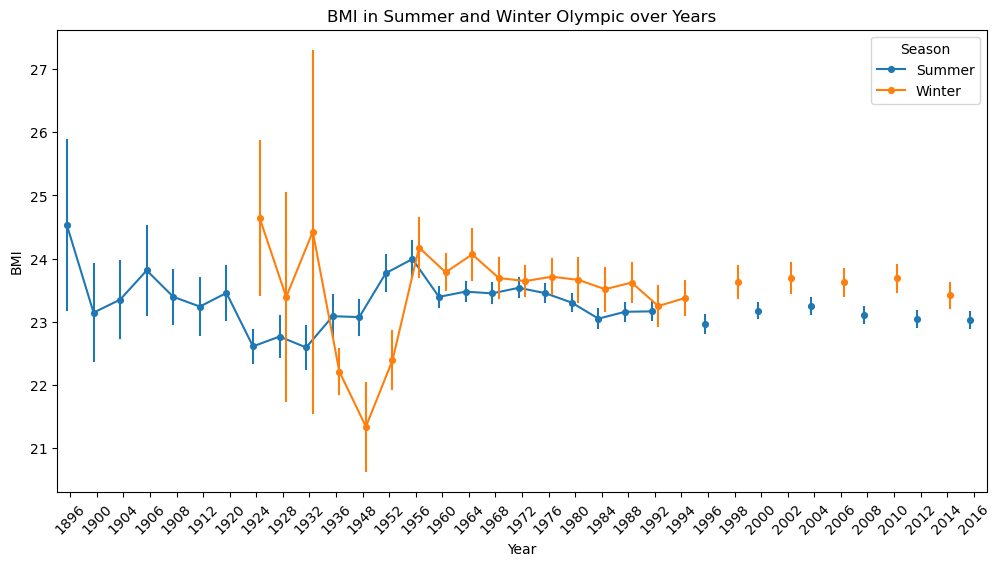

In [75]:
plt.figure(figsize=(12,6))
sns.pointplot(height_weight,x='Year',y='BMI',hue='Season',dodge=0.25,markersize=4,linewidth=1.5,errorbar='se').set_title('BMI in Summer and Winter Olympic over Years')
plt.xticks(rotation=45)
plt.show()

In [115]:
stdev = height_weight.groupby(['Year','Season','Sex'])[['BMI','Height','Weight']].std().reset_index()
stdev.rename(columns={'Weight': 'Weight_STD','Height': 'Height_STD','BMI': 'BMI_STD'}, inplace=True)
stdev


,Year,Season,Sex,BMI_STD,Height_STD,Weight_STD
0,1896,Summer,M,3.56,12.34,12.82
1,1900,Summer,M,2.67,6.86,9.14
2,1904,Summer,M,2.84,9.91,14.95
3,1906,Summer,M,3.58,7.10,12.63
4,1908,Summer,M,2.90,9.40,14.77
...,...,...,...,...,...,...
90,2012,Summer,M,3.01,11.30,16.27
91,2014,Winter,F,2.07,6.78,8.51
92,2014,Winter,M,2.52,6.00,11.30
93,2016,Summer,F,3.00,9.76,11.92


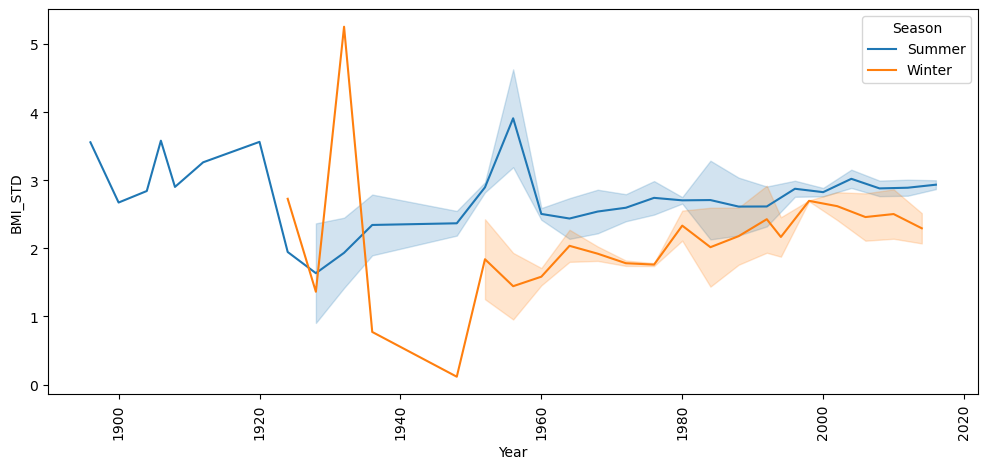

In [116]:
plt.figure(figsize=(12,5))
sns.lineplot(data=stdev,x='Year',y='BMI_STD',hue='Season')
plt.xticks(rotation = 90);


In [76]:
avg_bmi = height_weight.groupby('Sex')['BMI'].mean() 
avg_bmi


Sex
F   21.74
M   24.04
Name: BMI, dtype: float64

- As we can see in the graph, the average BMI and Standard Deviation became quite stable over years. Average BMI is sightly higher in winter.
- While BMI has its limitations as a health indicator, it remains a useful metric for assessing population health trends and general guidelines.The BMI of athletes is very variant. However the overall average BMI still stay in the healthy range according to standard BMI chart. 

#### Conclusion 
We can see that height, weight, BMI and standard deviation of these indicators become more consistent over time. This shows that sports have been professionalized and standardized to help athletes maximize their performance.
If we further analyze these indicators for each specific sport, we will be able to find those standard values. Which sport is explored further will depend on audience demand